In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator, FuncFormatter

In [184]:
df = pd.read_csv("Coffe_sales.csv")

In [185]:
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


In [187]:
# convert to datetime
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Time"] = pd.to_datetime(df["Time"], errors="coerce")

/var/folders/mc/2wjfdchj6vsffbrpfbfgqw4w0000gn/T/ipykernel_39852/3093750455.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Time"] = pd.to_datetime(df["Time"], errors="coerce")


In [188]:
df

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.70,Latte,Morning,Fri,Mar,5,3,2024-03-01,2025-10-21 10:15:50.520
1,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,2025-10-21 12:19:22.539
2,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,2025-10-21 12:20:18.089
3,13,card,28.90,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,2025-10-21 13:46:33.006
4,13,card,38.70,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,2025-10-21 13:48:14.626
...,...,...,...,...,...,...,...,...,...,...,...
3542,10,card,35.76,Cappuccino,Morning,Sun,Mar,7,3,2025-03-23,2025-10-21 10:34:54.894
3543,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,2025-10-21 14:43:37.362
3544,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,2025-10-21 14:44:16.864
3545,15,card,25.96,Americano,Afternoon,Sun,Mar,7,3,2025-03-23,2025-10-21 15:47:28.723


In [189]:
df[df.duplicated()]

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time


In [190]:
df.isnull().any()

hour_of_day    False
cash_type      False
money          False
coffee_name    False
Time_of_Day    False
Weekday        False
Month_name     False
Weekdaysort    False
Monthsort      False
Date           False
Time           False
dtype: bool

In [191]:
df["money"] = pd.to_numeric(df["money"], errors="coerce")

In [192]:
weekday_order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
month_order = [
    "Jan",
    "Feb",
    "Mar",
    "Apr",
    "May",
    "Jun",
    "Jul",
    "Aug",
    "Sep",
    "Oct",
    "Nov",
    "Dec",
]

df["Weekday"] = pd.Categorical(df["Weekday"], categories=weekday_order, ordered=True)
df["Month_name"] = pd.Categorical(
    df["Month_name"], categories=month_order, ordered=True
)

In [193]:
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,2025-10-21 10:15:50.520
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,2025-10-21 12:19:22.539
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,2025-10-21 12:20:18.089
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,2025-10-21 13:46:33.006
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,2025-10-21 13:48:14.626


# Question 1 
What times of day and days of the week generate the highest sales volume, and how can staffing or store hours be optimized to match customer demand? 

Purpose: Helps identify peak operational periods to guide shift scheduling and labor cost efficiency.

In [194]:
# general aggregations

sales_by_hour = (
    df.groupby("hour_of_day", as_index=False)["money"].sum().sort_values("hour_of_day")
)
count_by_hour = (
    df.groupby("hour_of_day", as_index=False)
    .size()
    .rename(columns={"size": "transactions"})
)
sales_by_timeofday = (
    df.groupby("Time_of_Day", as_index=False)["money"]
    .sum()
    .sort_values("money", ascending=False)
)
sales_by_weekday = (
    df.groupby(["Weekday", "Weekdaysort"], as_index=False)["money"]
    .sum()
    .sort_values("Weekdaysort")
)
sales_by_coffee = (
    df.groupby("coffee_name", as_index=False)["money"]
    .sum()
    .sort_values("money", ascending=False)
)

/var/folders/mc/2wjfdchj6vsffbrpfbfgqw4w0000gn/T/ipykernel_39852/2328788490.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["Weekday", "Weekdaysort"], as_index=False)["money"]


In [195]:
pivot_df = df.pivot_table(
    index="hour_of_day", columns="Weekday", values="money", aggfunc="sum", fill_value=0
)

/var/folders/mc/2wjfdchj6vsffbrpfbfgqw4w0000gn/T/ipykernel_39852/1772292445.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = df.pivot_table(


In [196]:
pivot_df

Weekday,Mon,Tue,Wed,Thu,Fri,Sat,Sun
hour_of_day,,,,,,,
6,61.72,0.00,0.00,0.00,87.68,0.00,0.00
7,694.12,486.42,551.08,416.86,575.08,66.62,55.84
8,1241.24,1465.10,897.88,670.10,1480.78,683.80,578.98
9,1184.44,1184.92,763.66,1026.70,1493.50,993.38,617.68
10,1650.78,1479.32,1479.82,1486.66,1333.84,1224.58,1543.52
11,1155.04,1728.16,1378.88,819.00,868.48,1602.24,901.30
12,734.76,918.94,966.92,866.02,1193.76,1455.82,1283.40
13,856.24,675.00,1328.44,992.92,1116.36,1055.14,1004.66
14,1389.22,1007.62,489.36,994.86,1055.62,1220.22,1016.90


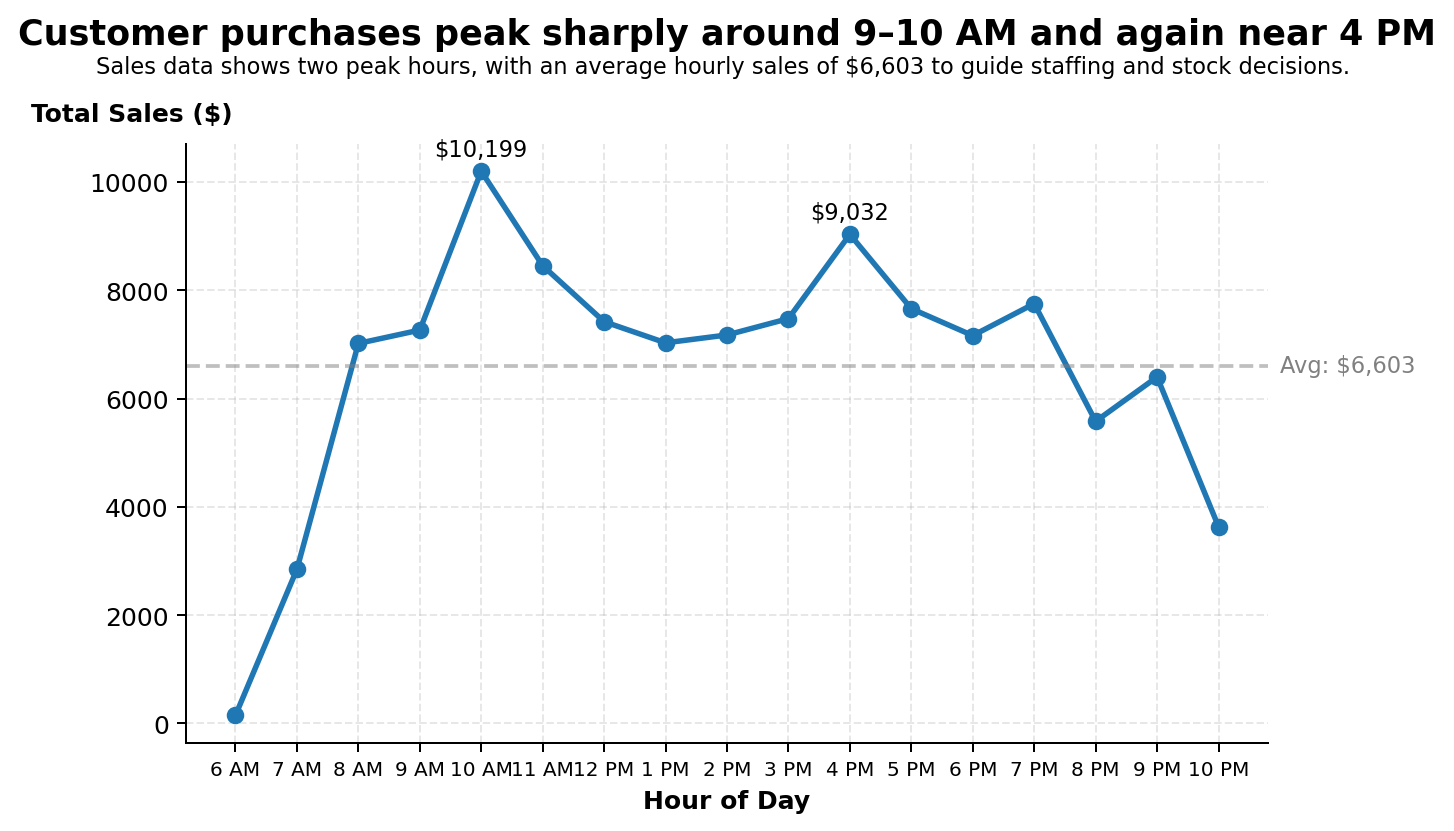

In [197]:
hourly_sales = df.groupby("hour_of_day")["money"].sum()

fig, ax = plt.subplots(figsize=(8, 5), dpi=180)

ax.plot(
    hourly_sales.index, hourly_sales.values, marker="o", linewidth=2.2, color="#1f77b4"
)
ax.grid(True, linestyle="--", alpha=0.3)

spacing = hourly_sales.max() * 0.02

peak_hours = [10, 16]
for x, y in zip(hourly_sales.index, hourly_sales.values):
    if x in peak_hours:
        ax.text(x, y + spacing, f"${y:,.0f}", ha="center", va="bottom", fontsize=9)

plt.title(
    "Customer purchases peak sharply around 9–10 AM and again near 4 PM",
    fontsize=14,
    fontweight="bold",
    pad=40,
)
plt.suptitle(
    "Sales data shows two peak hours, with an average hourly sales of $6,603 to guide staffing and stock decisions.",
    fontsize=9,
    fontweight="medium",
    y=0.872,
)
plt.xlabel("Hour of Day", fontsize=10, fontweight="bold")
plt.ylabel("", fontsize=10, fontweight="bold")

ax.text(
    -0.05,
    1.03,
    "Total Sales ($)",
    transform=ax.transAxes,
    ha="center",
    va="bottom",
    fontweight="bold",
    fontsize=10,
)

ax.set_xticks(range(6, 23))
ax.set_xticklabels(
    [f"{h%12 or 12} {'AM' if h < 12 else 'PM'}" for h in range(6, 23)],
    fontsize=8,
    fontweight="medium",
    family="sans-serif",
)

avg = hourly_sales.mean()
ax.axhline(avg, color="gray", linestyle="--", alpha=0.5, label="Average")

ax.text(
    x=hourly_sales.index[-1] + 1,
    y=avg,
    s=f"Avg: ${avg:,.0f}",
    va="center",
    ha="left",
    fontsize=9,
    color="gray",
    fontweight="medium",
)

sns.despine()
plt.tight_layout()
plt.show()

/var/folders/mc/2wjfdchj6vsffbrpfbfgqw4w0000gn/T/ipykernel_39852/2258953817.py:28: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_sales = df.pivot_table(
/var/folders/mc/2wjfdchj6vsffbrpfbfgqw4w0000gn/T/ipykernel_39852/2258953817.py:168: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, 1, 0.90], pad=2.0)


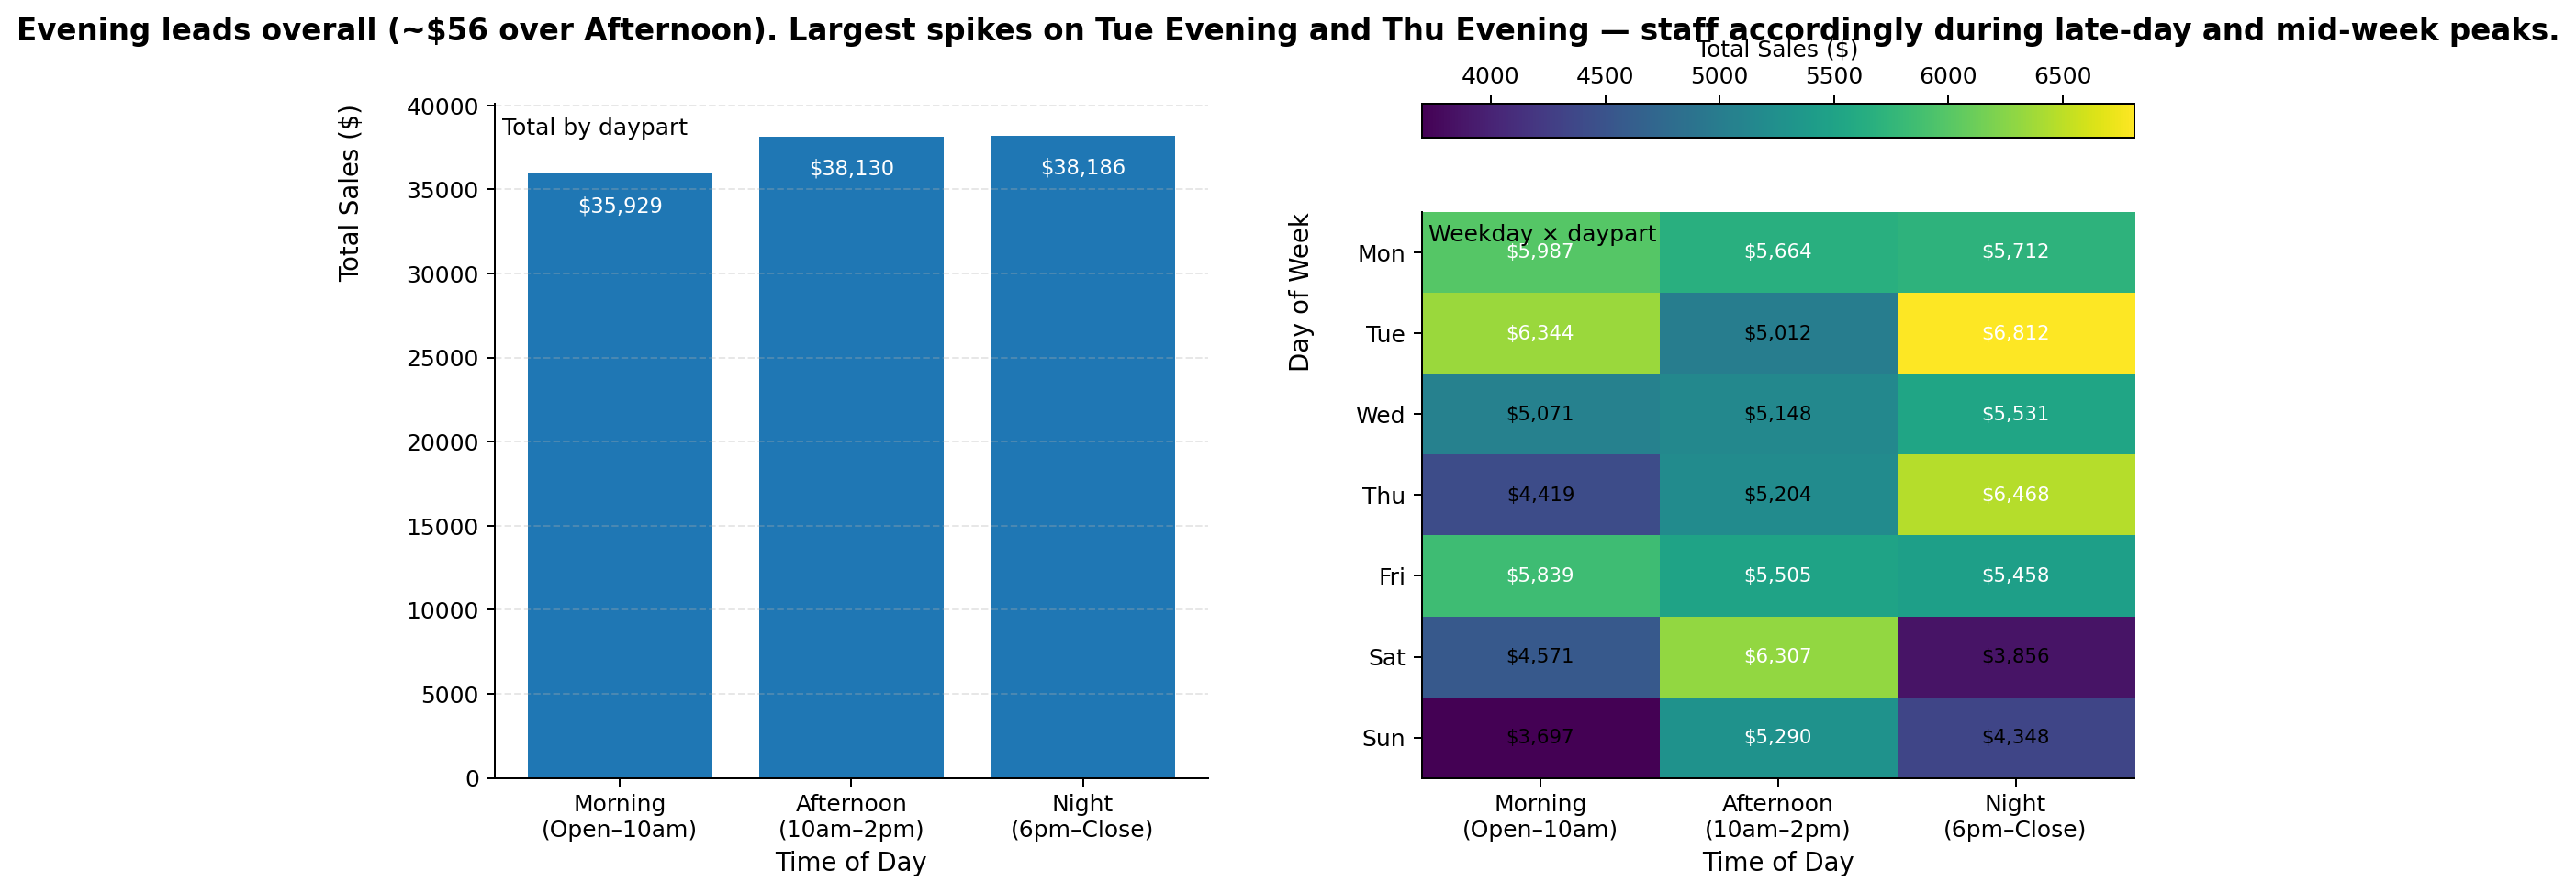

In [198]:
# ===========================
# Daypart bar + Weekday×Daypart heatmap
# One super-title summarizing BOTH panels (reworded ending)
# + horizontal colorbar on TOP of heatmap
# ===========================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

DAYPART_ORDER = ["Morning", "Afternoon", "Night"]
DAYPART_DESC = {"Morning": "Open–10am", "Afternoon": "10am–2pm", "Night": "6pm–Close"}
NORMALIZE_BY_WEEKDAY = False

# --- ensure ordering for bar
sales_by_timeofday_ord = (
    sales_by_timeofday.set_index("Time_of_Day")
    .reindex(
        [d for d in DAYPART_ORDER if d in sales_by_timeofday["Time_of_Day"].unique()]
    )
    .reset_index()
)
xticklabels = [
    f"{dp}\n({DAYPART_DESC.get(dp,'')})" for dp in sales_by_timeofday_ord["Time_of_Day"]
]

# --- heatmap data
pivot_sales = df.pivot_table(
    index="Weekday", columns="Time_of_Day", values="money", aggfunc="sum", fill_value=0
).reindex(
    columns=[
        c for c in DAYPART_ORDER if c in sales_by_timeofday["Time_of_Day"].unique()
    ]
)
weekday_order = (
    df[["Weekday", "Weekdaysort"]]
    .drop_duplicates()
    .sort_values("Weekdaysort")["Weekday"]
    .tolist()
)
pivot_sales = pivot_sales.reindex(index=weekday_order)

# ---------- super-title parts ----------
_sorted_dp = sales_by_timeofday_ord.sort_values("money", ascending=False)
dp1, dp2 = _sorted_dp.iloc[0], _sorted_dp.iloc[1]
gap = abs(dp1["money"] - dp2["money"])
friendly_dp = {"Night": "Evening"}
dp1_name = friendly_dp.get(dp1["Time_of_Day"], dp1["Time_of_Day"])
dp2_name = friendly_dp.get(dp2["Time_of_Day"], dp2["Time_of_Day"])

flat = (
    pivot_sales.stack()
    .reset_index()
    .rename(columns={"level_0": "Weekday", "level_1": "Time_of_Day", 0: "money"})
    .sort_values("money", ascending=False)
)
top_spikes = flat.head(2)[["Weekday", "Time_of_Day", "money"]].reset_index(drop=True)


def dp_friendly(d):
    return friendly_dp.get(d, d)


if len(top_spikes) == 2:
    w1, d1 = top_spikes.loc[0, "Weekday"], dp_friendly(top_spikes.loc[0, "Time_of_Day"])
    w2, d2 = top_spikes.loc[1, "Weekday"], dp_friendly(top_spikes.loc[1, "Time_of_Day"])
    super_title = (
        f"{dp1_name} leads overall (~${gap:,.0f} over {dp2_name}). "
        f"Largest spikes on {w1} {d1} and {w2} {d2} — staff accordingly during late-day and mid-week peaks."
    )
else:
    super_title = (
        f"{dp1_name} leads overall (~${gap:,.0f} over {dp2_name}). "
        f"Sales vary by weekday and daypart — staff accordingly during late-day and mid-week peaks."
    )

# ---------- normalize option ----------
if NORMALIZE_BY_WEEKDAY:
    denom = pivot_sales.sum(axis=1).replace(0, np.nan)
    heat_vals = (pivot_sales.T / denom).T.values
    cbar_label = "Share of weekday sales"
else:
    heat_vals = pivot_sales.values
    cbar_label = "Total Sales ($)"

# ---------- plot ----------
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(12.8, 5.3), dpi=180, gridspec_kw={"wspace": 0.30}
)

# ===== left: bar =====
bars = ax1.bar(
    np.arange(len(sales_by_timeofday_ord)), sales_by_timeofday_ord["money"].values
)
ymax = sales_by_timeofday_ord["money"].max()
for x, v in enumerate(sales_by_timeofday_ord["money"].values):
    ytext = v - ymax * 0.05 if v > ymax * 0.12 else v + ymax * 0.02
    va = "center" if v > ymax * 0.12 else "bottom"
    color = "white" if v > ymax * 0.12 else "#333"
    ax1.text(x, ytext, f"${v:,.0f}", ha="center", va=va, fontsize=9, color=color)

ax1.set_xticks(np.arange(len(xticklabels)))
ax1.set_xticklabels(xticklabels)
ax1.set_xlabel("Time of Day", fontsize=11)
ax1.set_ylabel("Total Sales ($)", fontsize=11, labelpad=18, loc="top")
ax1.grid(axis="y", linestyle="--", alpha=0.3)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.text(
    0.01,
    0.98,
    "Total by daypart",
    transform=ax1.transAxes,
    ha="left",
    va="top",
    fontsize=10,
)

# ===== right: heatmap =====
im = ax2.imshow(heat_vals, aspect="auto")
ax2.set_xticks(np.arange(pivot_sales.shape[1]))
ax2.set_xticklabels(
    [f"{c}\n({DAYPART_DESC.get(c,'')})" for c in pivot_sales.columns], fontsize=10
)
ax2.set_yticks(np.arange(pivot_sales.shape[0]))
ax2.set_yticklabels(pivot_sales.index, fontsize=10)

# contrast-aware cell labels
vals_print = (
    (pivot_sales.T / (pivot_sales.sum(axis=1).replace(0, np.nan))).T
    if NORMALIZE_BY_WEEKDAY
    else pivot_sales
)
vmin, vmax = np.nanmin(heat_vals), np.nanmax(heat_vals)
mid = (vmin + vmax) / 2.0
for i in range(pivot_sales.shape[0]):
    for j in range(pivot_sales.shape[1]):
        raw = vals_print.values[i, j]
        label = f"{raw*100:.0f}%" if NORMALIZE_BY_WEEKDAY else f"${raw:,.0f}"
        color = "white" if heat_vals[i, j] >= mid else "black"
        ax2.text(j, i, label, ha="center", va="center", fontsize=8.5, color=color)

# --- horizontal colorbar on TOP of heatmap
divider = make_axes_locatable(ax2)
cax = divider.append_axes("top", size="6%", pad=0.45)
cb = fig.colorbar(im, cax=cax, orientation="horizontal")
cax.xaxis.set_ticks_position("top")
cax.xaxis.set_label_position("top")
cb.set_label(cbar_label, fontsize=10)

ax2.set_xlabel("Time of Day", fontsize=11)
ax2.set_ylabel("Day of Week", fontsize=11, labelpad=18, loc="top")
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.text(
    0.01,
    0.98,
    "Weekday × daypart",
    transform=ax2.transAxes,
    ha="left",
    va="top",
    fontsize=10,
)

# ===== shared super-title =====
fig.suptitle(super_title, fontsize=13, weight="bold", y=0.98)

fig.tight_layout(rect=[0, 0, 1, 0.90], pad=2.0)
# fig.savefig("q1_daypart_pair_supertitle_topcbar.png", bbox_inches="tight", dpi=300)
plt.show()

In [199]:
hour_sales = sales_by_hour.set_index("hour_of_day")["money"]
normalized = hour_sales / hour_sales.max() if hour_sales.max() > 0 else hour_sales * 0
recommended_staff = (normalized * 5).apply(math.ceil) + 1

recommended_df = recommended_staff.reset_index().rename(
    columns={"money": "recommended_staff"}
)

rec_hours = (
    pd.DataFrame({"hour_of_day": range(0, 24)})
    .merge(recommended_df, on="hour_of_day", how="left")
    .fillna(1)
)
rec_hours["recommended_staff"] = rec_hours["recommended_staff"].astype(int)

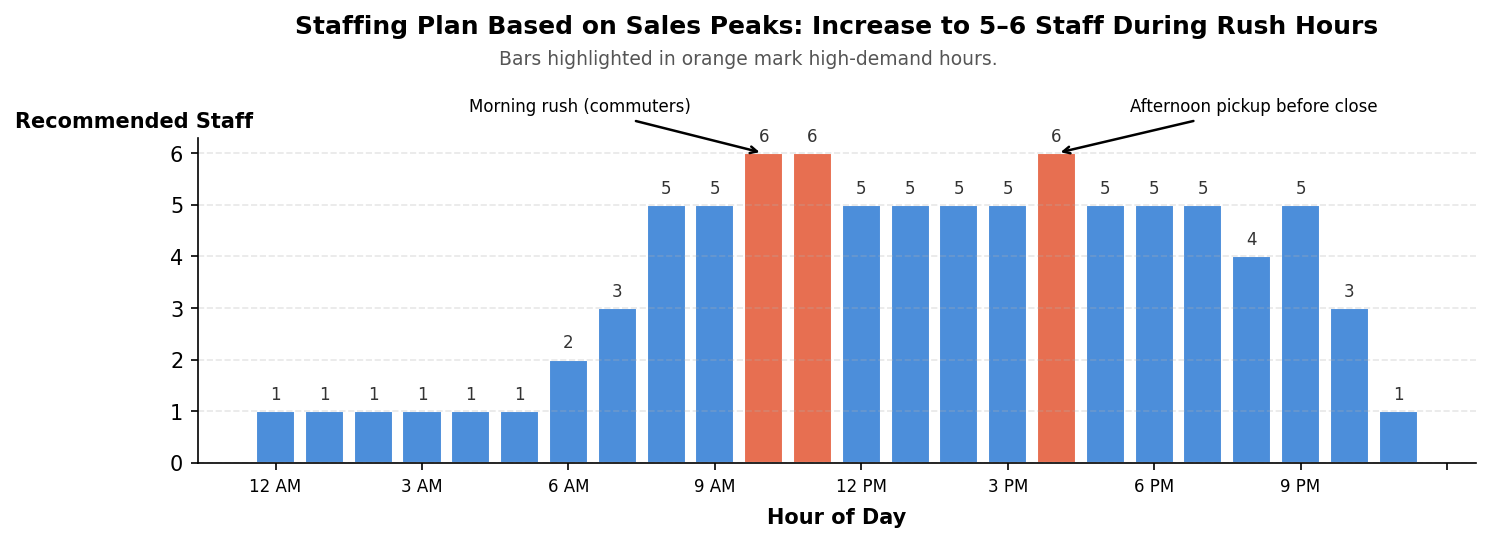

In [200]:
plt.figure(figsize=(10, 4), dpi=150)
bars = plt.bar(
    rec_hours["hour_of_day"],
    rec_hours["recommended_staff"],
    color="#4C8EDA",
    edgecolor="white",
)

for idx, val in enumerate(rec_hours["recommended_staff"]):
    plt.text(
        rec_hours["hour_of_day"].iloc[idx],
        val + 0.15,
        str(val),
        ha="center",
        va="bottom",
        fontsize=8,
        color="#333",
    )

peak_hours = [10, 11, 16]
plt.bar(
    rec_hours.loc[rec_hours["hour_of_day"].isin(peak_hours), "hour_of_day"],
    rec_hours.loc[rec_hours["hour_of_day"].isin(peak_hours), "recommended_staff"],
    color="#E76F51",
    edgecolor="white",
)

plt.title(
    "Staffing Plan Based on Sales Peaks: Increase to 5–6 Staff During Rush Hours",
    fontsize=12,
    fontweight="bold",
    pad=50,
)
plt.suptitle(
    "Bars highlighted in orange mark high-demand hours.",
    fontsize=9,
    color="#555",
    y=0.835,
)

plt.xlabel("Hour of Day", fontsize=10, fontweight="bold", labelpad=6)
plt.ylabel("")
plt.text(
    -0.05,
    1.02,
    "Recommended Staff",
    transform=plt.gca().transAxes,
    ha="center",
    va="bottom",
    fontweight="bold",
    fontsize=10,
)

ax = plt.gca()
ax.set_xticks(range(0, 24))
ax.set_xticklabels(
    [f"{h%12 or 12} {'AM' if h < 12 else 'PM'}" for h in range(0, 24)],
    rotation=0,
    fontsize=8,
    fontweight="medium",
    family="sans-serif",
)

plt.annotate(
    "Morning rush (commuters)",
    xy=(10, 6),
    xytext=(8.5, 6.8),
    arrowprops=dict(arrowstyle="->", color="black", lw=1.2),
    fontsize=8,
    color="black",
    ha="right",
)

plt.annotate(
    "Afternoon pickup before close",
    xy=(16, 6),
    xytext=(17.5, 6.8),
    arrowprops=dict(arrowstyle="->", color="black", lw=1.2),
    fontsize=8,
    color="black",
    ha="left",
)


ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.grid(axis="y", linestyle="--", alpha=0.3)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()

# TODO ABOVE

## In the above we need to post processes by either taking a screenshot and write our title. We need the subtitle to have the same colour and the orange we have in the bar charts.

## Also open to changing the color to grey and blue so we focus on the high staff


In [201]:
rec_open_hours = rec_hours[rec_hours["recommended_staff"] > 1][
    ["hour_of_day", "recommended_staff"]
]
print("Recommended Staff by Hour (hours with >1 staff):")
print(rec_open_hours)

Recommended Staff by Hour (hours with >1 staff):
    hour_of_day  recommended_staff
6             6                  2
7             7                  3
8             8                  5
9             9                  5
10           10                  6
11           11                  6
12           12                  5
13           13                  5
14           14                  5
15           15                  5
16           16                  6
17           17                  5
18           18                  5
19           19                  5
20           20                  4
21           21                  5
22           22                  3


# Question 2
Which types of coffee are most popular during different times of the day, and how should inventory and promotions adjust accordingly?
Purpose: Helps managers plan inventory and marketing by matching coffee types to customer habits (e.g., cappuccinos in the morning, iced drinks in the afternoon).

/var/folders/mc/2wjfdchj6vsffbrpfbfgqw4w0000gn/T/ipykernel_39852/4062252241.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, 1, 0.92], pad=2.0)


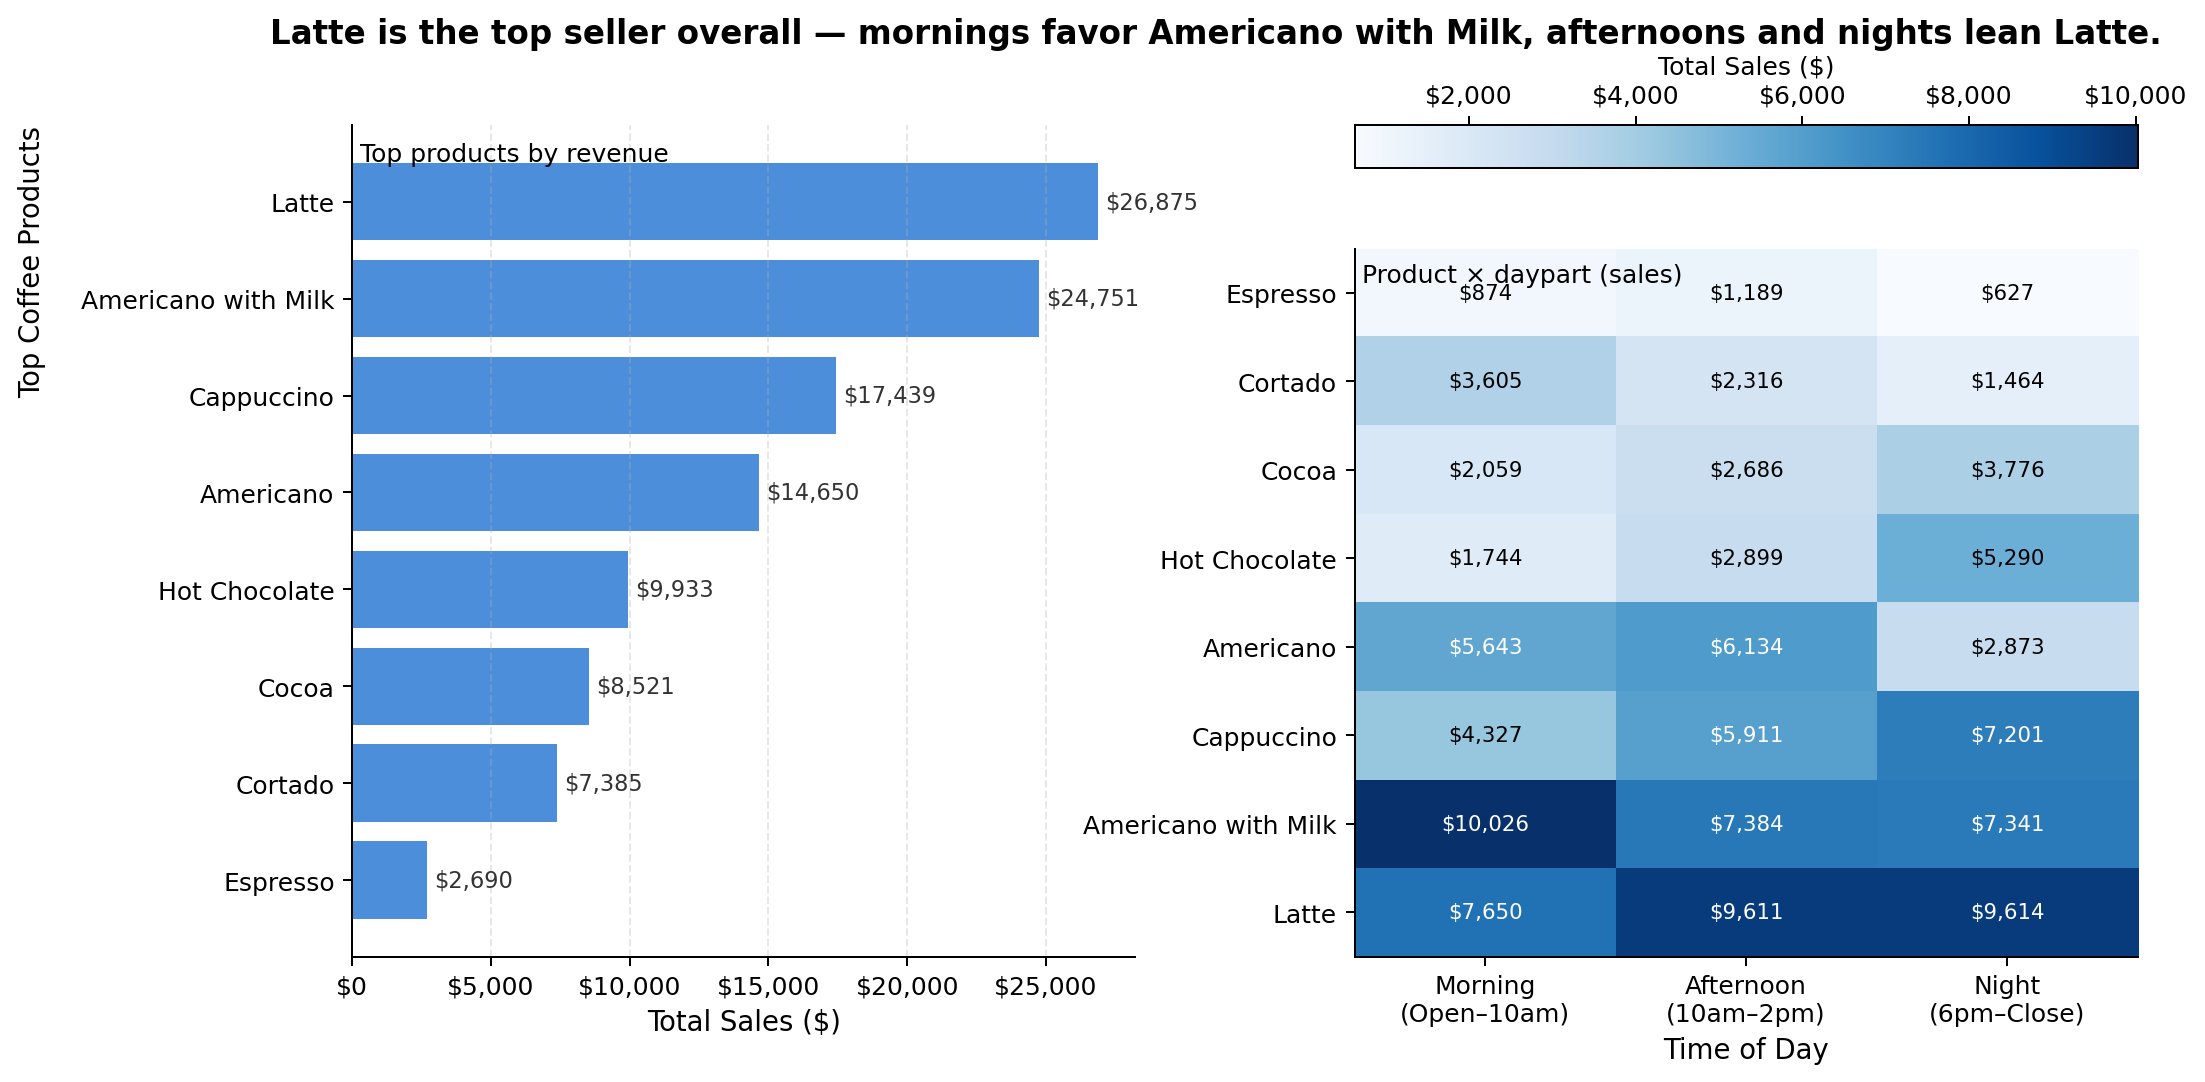

In [202]:
# ===========================================
# Q2 — Top products + product × daypart heatmap
# ===========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable

# ---- Config
DAYPART_ORDER = ["Morning", "Afternoon", "Night"]
DAYPART_DESC = {"Morning": "Open–10am", "Afternoon": "10am–2pm", "Night": "6pm–Close"}
TOP_N = 8
CMAP = "Blues"
CURRENCY = FuncFormatter(lambda x, p: f"${x:,.0f}")

# --------- 1) Top products by revenue
sales_by_coffee_ord = sales_by_coffee.sort_values("money", ascending=True).tail(TOP_N)
overall_top = sales_by_coffee_ord.iloc[-1]["coffee_name"]
overall_top_amt = sales_by_coffee_ord.iloc[-1]["money"]

# --------- 2) Product × Daypart pivot
coffee_heatmap = (
    df[df["coffee_name"].isin(sales_by_coffee_ord["coffee_name"])]
    .pivot_table(
        index="coffee_name",
        columns="Time_of_Day",
        values="money",
        aggfunc="sum",
        fill_value=0,
    )
    .reindex(index=sales_by_coffee_ord["coffee_name"].tolist())
    .reindex(columns=[d for d in DAYPART_ORDER if d in df["Time_of_Day"].unique()])
)

# Identify leaders by daypart
daypart_leads = coffee_heatmap.idxmax(axis=0)
lead_morn = daypart_leads.get("Morning", None)
lead_aft = daypart_leads.get("Afternoon", None)
lead_night = daypart_leads.get("Night", None)

# --------- Plot
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(12.8, 6), dpi=180, gridspec_kw={"wspace": 0.28}
)

# ===== Left: Top products by revenue =====
y = np.arange(len(sales_by_coffee_ord))
bars = ax1.barh(y, sales_by_coffee_ord["money"].values, color="#4C8EDA")

# direct value labels
xmax = sales_by_coffee_ord["money"].max()
for yi, v in zip(y, sales_by_coffee_ord["money"].values):
    ax1.text(v + xmax * 0.01, yi, f"${v:,.0f}", va="center", fontsize=9, color="#333")

ax1.set_yticks(y)
ax1.set_yticklabels(sales_by_coffee_ord["coffee_name"])
ax1.set_xlabel("Total Sales ($)", fontsize=11)
ax1.set_ylabel("Top Coffee Products", fontsize=11, labelpad=14, loc="top")
ax1.xaxis.set_major_formatter(CURRENCY)
ax1.grid(axis="x", linestyle="--", alpha=0.3)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.text(
    0.01,
    0.98,
    "Top products by revenue",
    transform=ax1.transAxes,
    ha="left",
    va="top",
    fontsize=10,
)

# ===== Right: Heatmap (product × daypart) =====
heat_vals = coffee_heatmap.values
im = ax2.imshow(heat_vals, aspect="auto", cmap=CMAP)

# ticks / labels with daypart meanings
ax2.set_xticks(np.arange(coffee_heatmap.shape[1]))
ax2.set_xticklabels(
    [f"{c}\n({DAYPART_DESC.get(c,'')})" for c in coffee_heatmap.columns], fontsize=10
)
ax2.set_yticks(np.arange(coffee_heatmap.shape[0]))
ax2.set_yticklabels(coffee_heatmap.index, fontsize=10)

# contrast-aware in-cell $ annotations
vmin, vmax = np.nanmin(heat_vals), np.nanmax(heat_vals)
mid = (vmin + vmax) / 2.0
for i in range(coffee_heatmap.shape[0]):
    for j in range(coffee_heatmap.shape[1]):
        val = heat_vals[i, j]
        color = "white" if val >= mid else "black"
        ax2.text(
            j, i, f"${val:,.0f}", ha="center", va="center", fontsize=8.5, color=color
        )

# horizontal currency colorbar on TOP
divider = make_axes_locatable(ax2)
cax = divider.append_axes("top", size="6%", pad=0.45)
cb = fig.colorbar(im, cax=cax, orientation="horizontal")
cax.xaxis.set_ticks_position("top")
cax.xaxis.set_label_position("top")
cb.ax.xaxis.set_major_formatter(CURRENCY)
cb.set_label("Total Sales ($)", fontsize=10)

ax2.set_xlabel("Time of Day", fontsize=11)
ax2.set_ylabel("")  # removed to avoid overlap
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.text(
    0.01,
    0.98,
    "Product × daypart (sales)",
    transform=ax2.transAxes,
    ha="left",
    va="top",
    fontsize=10,
)

# --------- Fixed, plain-English active title
suptitle = "Latte is the top seller overall — mornings favor Americano with Milk, afternoons and nights lean Latte."
fig.suptitle(suptitle, fontsize=13, weight="bold", y=0.98)

# layout
fig.tight_layout(rect=[0, 0, 1, 0.92], pad=2.0)
plt.show()

In [203]:
# ===========================================
# Q2 — Average ticket by product & daypart
# ===========================================
import textwrap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# --- formatting helpers ---
CURRENCY = FuncFormatter(lambda x, p: f"${x:,.0f}")
DAYPART_ORDER = ["Morning", "Afternoon", "Night"]
DAYPART_DESC = {"Morning": "Open–10am", "Afternoon": "10am–2pm", "Night": "6pm–Close"}
TOP_PER_DP = 5
HILITE_COLOR = "#2F6DB0"
BAR_COLOR = "#7AA6E6"


def wrap_name(s, width=12, max_lines=2):
    """Wrap long product names to avoid y-axis crowding"""
    if not isinstance(s, str):
        return s
    wrapped = textwrap.wrap(s, width=width)
    if len(wrapped) > max_lines:
        wrapped = wrapped[:max_lines]
        wrapped[-1] = wrapped[-1].rstrip(".") + "…"
    return "\n".join(wrapped)


# --- aggregate: transactions & revenue, then compute average ticket ---
tx = df.groupby(["Time_of_Day", "coffee_name"]).size().rename("tx").reset_index()
rev = (
    df.groupby(["Time_of_Day", "coffee_name"])["money"]
    .sum()
    .rename("rev")
    .reset_index()
)
avg = tx.merge(rev, on=["Time_of_Day", "coffee_name"])
avg["avg_ticket"] = avg["rev"] / avg["tx"]
avg["Time_of_Day"] = pd.Categorical(
    avg["Time_of_Day"], categories=DAYPART_ORDER, ordered=True
)

# --- compute overall scale for x-axis ---
x_limit = avg["avg_ticket"].max() * 1.15

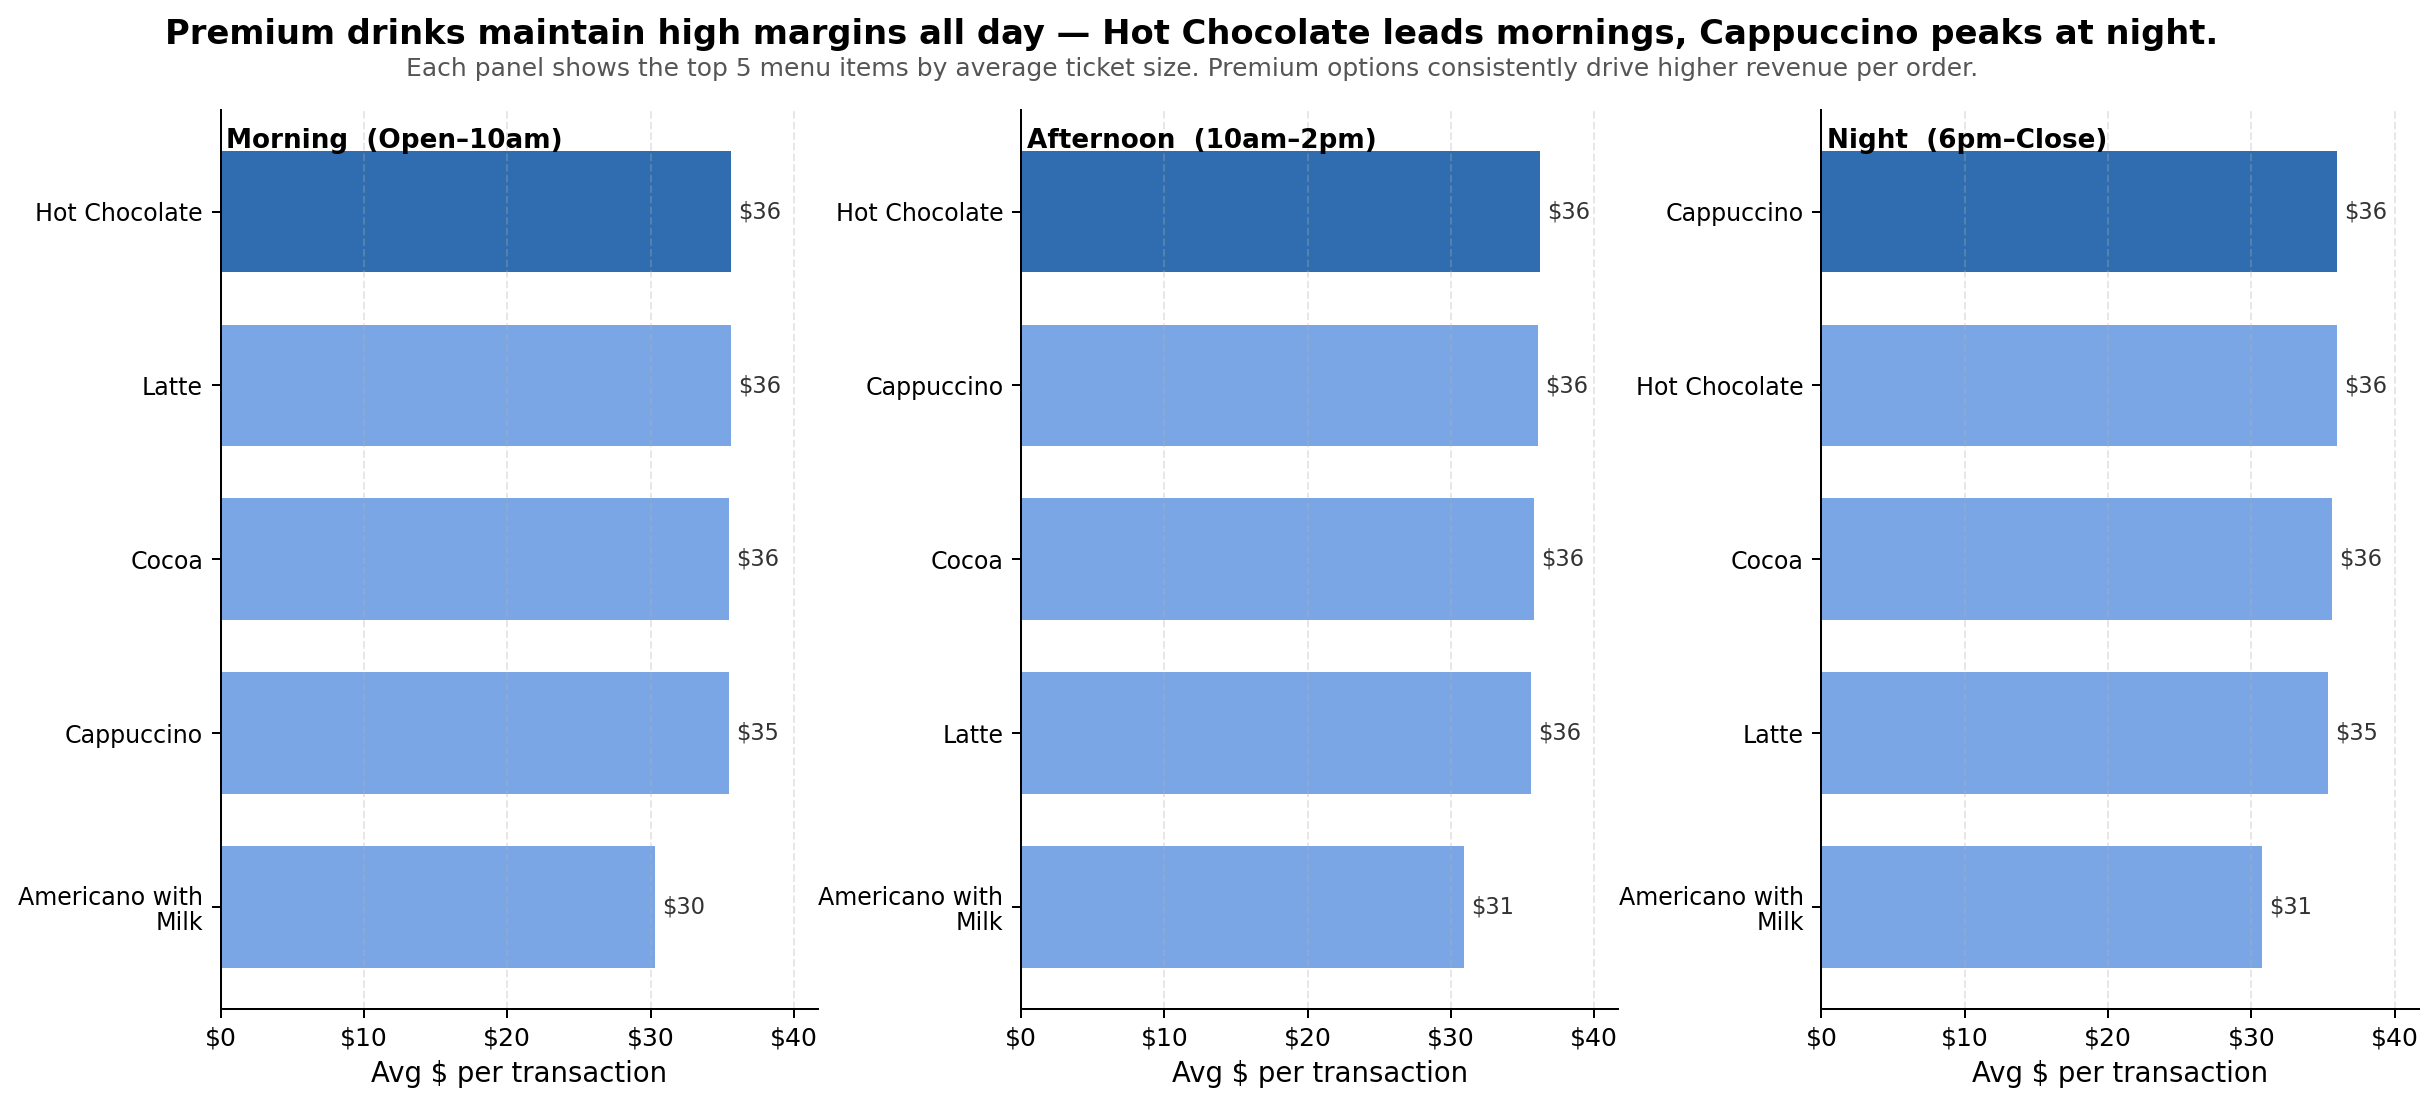

In [ ]:
fig, axes = plt.subplots(
    1, 3, figsize=(14.2, 6.4), dpi=180, gridspec_kw={"wspace": 0.34}
)

fig.suptitle(
    "Premium drinks maintain high margins all day — Hot Chocolate leads mornings, Cappuccino peaks at night.",
    fontsize=13.5,
    weight="bold",
    y=0.98,
)

fig.text(
    0.5,
    0.93,
    "Each panel shows the top 5 menu items by average ticket size. "
    "Premium options consistently drive higher revenue per order.",
    ha="center",
    color="#555",
    fontsize=10,
)

for i, dp in enumerate(DAYPART_ORDER):
    ax = axes[i]
    d = avg[avg["Time_of_Day"] == dp].copy()

    if d.empty:
        ax.set_axis_off()
        ax.text(0.5, 0.5, f"No data for {dp}", ha="center", va="center")
        continue

    d = d.sort_values("avg_ticket", ascending=False).head(TOP_PER_DP)
    d = d.sort_values("avg_ticket", ascending=True)  # for barh orientation

    y = np.arange(len(d))
    colors = [BAR_COLOR] * len(d)
    colors[-1] = HILITE_COLOR  # highlight the top bar

    ax.barh(y, d["avg_ticket"].values, color=colors, height=0.7)

    for yi, v in zip(y, d["avg_ticket"].values):
        ax.text(
            v + x_limit * 0.012, yi, f"${v:,.0f}", va="center", fontsize=9, color="#333"
        )

    ax.set_yticks(y)
    ax.set_yticklabels(
        [wrap_name(n, width=14, max_lines=2) for n in d["coffee_name"]],
        fontsize=9.5,
        linespacing=1.1,
    )

    ax.set_xlim(0, x_limit)
    ax.set_xlabel("Avg $ per transaction", fontsize=11)
    ax.text(
        0.01,
        0.98,
        f"{dp}  ({DAYPART_DESC.get(dp, '')})",
        transform=ax.transAxes,
        ha="left",
        va="top",
        fontsize=10.5,
        weight="bold",
    )

    ax.xaxis.set_major_formatter(CURRENCY)
    ax.grid(axis="x", linestyle="--", alpha=0.3)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)


plt.subplots_adjust(left=0.12, right=0.98, top=0.90, bottom=0.12)
plt.show()

In [ ]:
assert {"hour_of_day", "money"} <= set(df.columns), "Missing columns."

OPEN_HOUR = 6  # 6 AM
CLOSE_HOUR = 20  # 8 PM

h = (
    df.assign(hour_of_day=pd.to_numeric(df["hour_of_day"], errors="coerce"))
    .dropna(subset=["hour_of_day", "money"])
    .query("@OPEN_HOUR <= hour_of_day <= @CLOSE_HOUR")
    .groupby("hour_of_day", dropna=True)["money"]
    .sum()
    .sort_index()
)

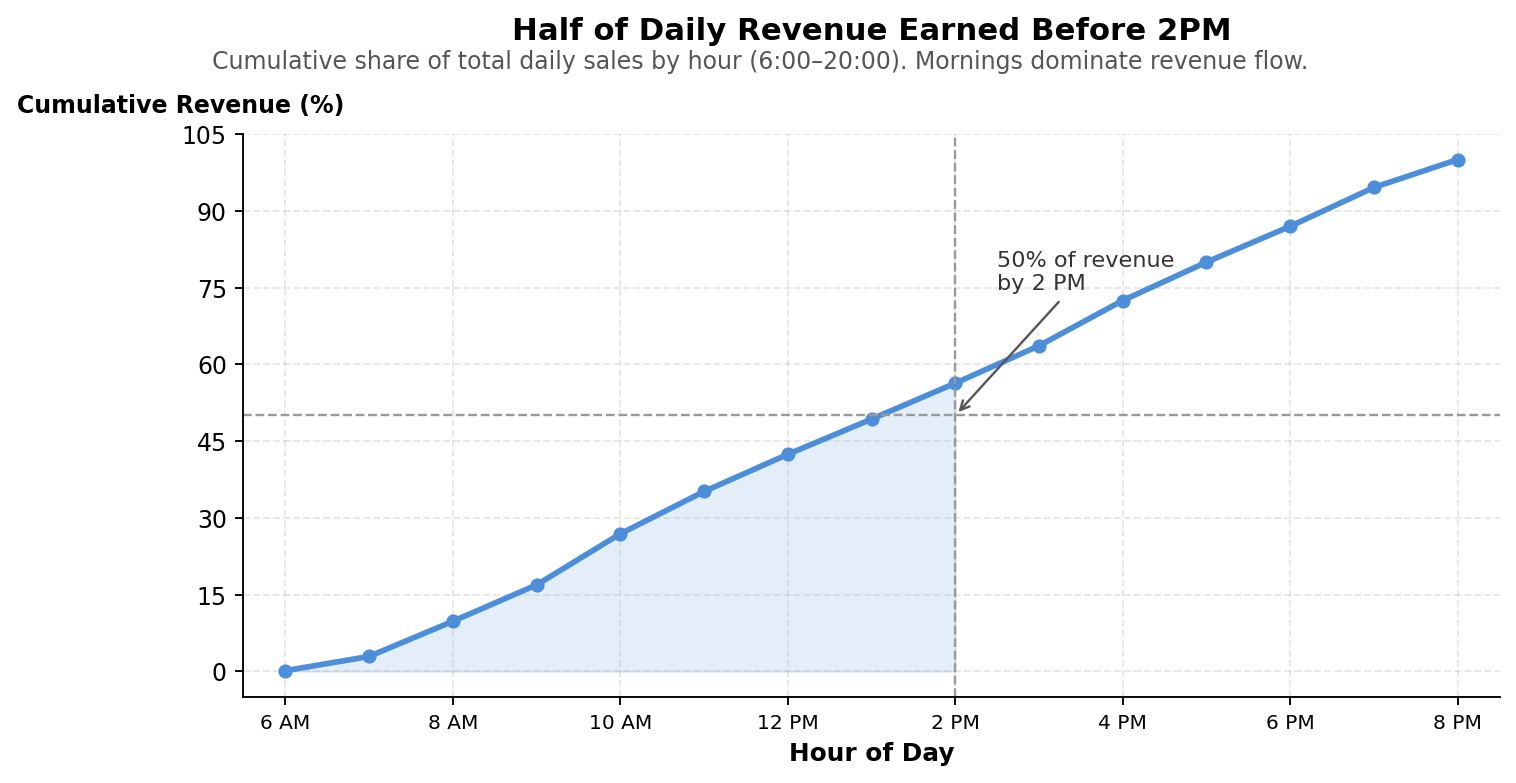

In [217]:
if h.empty:
    print("No hourly data to plot within open hours.")
else:
    cum_pct = h.cumsum() / h.sum() * 100
    half_idx = (cum_pct >= 50).idxmax()

    plt.figure(figsize=(9, 5), dpi=170)
    ax = plt.gca()

    plt.plot(
        cum_pct.index,
        cum_pct.values,
        color="#4C8EDA",
        lw=2.4,
        marker="o",
        markersize=5,
    )

    plt.fill_between(
        cum_pct.index,
        0,
        cum_pct.values,
        where=cum_pct.index <= half_idx,
        color="#4C8EDA",
        alpha=0.15,
    )

    plt.axhline(50, ls="--", c="#999", lw=1)
    plt.axvline(half_idx, ls="--", c="#999", lw=1)

    hour_12 = half_idx % 12
    hour_12 = 12 if hour_12 == 0 else hour_12
    period = "AM" if half_idx < 12 else "PM"

    plt.annotate(
        f"50% of revenue\nby {hour_12} {period}",
        xy=(half_idx, 50),
        xytext=(half_idx + 0.5, 78),
        arrowprops=dict(arrowstyle="->", color="#555", lw=1),
        fontsize=9.5,
        color="#333",
        ha="left",
        va="center",
    )

    plt.title(
        "Half of Daily Revenue Earned Before 2PM",
        fontsize=13,
        fontweight="bold",
        pad=40,
    )
    plt.suptitle(
        f"Cumulative share of total daily sales by hour ({OPEN_HOUR}:00–{CLOSE_HOUR}:00). Mornings dominate revenue flow.",
        fontsize=10,
        color="#555",
        y=0.873,
    )

    ax.set_xlabel("Hour of Day", fontsize=10.5, fontweight="bold")

    ax.text(
        -0.05,
        1.03,
        "Cumulative Revenue (%)",
        transform=ax.transAxes,
        ha="center",
        va="bottom",
        fontweight="bold",
        fontsize=10,
    )

    ax.set_xlim(OPEN_HOUR - 0.5, CLOSE_HOUR + 0.5)
    ax.set_xticks(range(OPEN_HOUR, CLOSE_HOUR + 1, 2))
    ax.set_xticklabels(
        [
            f"{h%12 or 12} {'AM' if h < 12 else 'PM'}"
            for h in range(OPEN_HOUR, CLOSE_HOUR + 1, 2)
        ],
        fontsize=8.5,
    )

    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.grid(axis="both", linestyle="--", alpha=0.3)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    plt.tight_layout()
    plt.show()